CS 3101 - Discrete Structures 3
Caitlin Lindsay

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

file_path = r"C:\Users\Cait\Documents\Documents\School 2023-2024\First Sem\CS 3101N -DS3\2012WS raw nematode data.ods"
df = pd.read_excel(file_path, skiprows=5)
# Rename columns to remove the additional information
df.rename(columns={
    'RKN1lfernandez:total number of J2 per whole root system': 'RKN1',
    'Ho1lfernandez:total number of Ho per whole root system': 'Ho1',
    'RKN2lfernandez:total number of j2 per gram root': 'RKN2',
    'Ho2lfernandez:total number of ho per gram root': 'Ho2'
}, inplace=True)

#print("Unique values in 'Cropping Pattern':", df['Cropping Pattern'].unique())
#print("Unique values in 'Nitrogen fertilization':", df['Nitrogen fertilization'].unique())
#print("Unique values in 'Code':", df['Code'].unique())

df_encoded = pd.get_dummies(df, columns=['Cropping Pattern', 'Nitrogen fertilization', 'Code'])


#print("Unique values in 'Cropping Pattern' after encoding:", df_encoded.filter(like='Cropping Pattern').columns)
#print("Unique values in 'Nitrogen fertilization' after encoding:", df_encoded.filter(like='Nitrogen fertilization').columns)
#print("Unique values in 'Code' after encoding:", df_encoded.filter(like='Code').columns)

#print(df.head())
print(df_encoded.head())



   Plot ID  sample#  Rep  GR    FRTWT  DRTWT  RKN1  Ho1       RKN2  Ho2  \
0       17        1    1   1  21.0910  1.929     0    0   0.000000  0.0   
1       17        2    1   0  24.9125  1.406     0    0   0.000000  0.0   
2       17        3    1   0  20.8350  1.228   450    0  21.598272  0.0   
3       17        4    1   0  18.4870  1.463   600    0  32.455239  0.0   
4       17        5    1   0  27.4960  2.152     0    0   0.000000  0.0   

   Grtrans  Cropping Pattern_Maize Mix  Cropping Pattern_Rice Mix  \
0     0.05                           1                          0   
1     0.00                           1                          0   
2     0.00                           1                          0   
3     0.00                           1                          0   
4     0.00                           1                          0   

   Cropping Pattern_Rice Wet  Nitrogen fertilization_Conventional  \
0                          0                                    1

array([[ 0.        ,  3.18201265,  3.32518261, ...,  7.83069478,
         8.12359401,  8.53340245],
       [ 3.18201265,  0.        ,  0.9314538 , ...,  7.2617395 ,
         7.44929077, 10.04966301],
       [ 3.32518261,  0.9314538 ,  0.        , ...,  7.25532082,
         7.28637122,  9.99102564],
       ...,
       [ 7.83069478,  7.2617395 ,  7.25532082, ...,  0.        ,
         1.42569783,  6.96430395],
       [ 8.12359401,  7.44929077,  7.28637122, ...,  1.42569783,
         0.        ,  7.10978516],
       [ 8.53340245, 10.04966301,  9.99102564, ...,  6.96430395,
         7.10978516,  0.        ]])

In [53]:
data = df_encoded.drop(['Plot ID', 'sample#'], axis=1)
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Create the affinity matrix
affinity_matrix = euclidean_distances(standardized_data, standardized_data)
affinity_matrix

array([[ 0.        ,  3.18201265,  3.32518261, ...,  7.83069478,
         8.12359401,  8.53340245],
       [ 3.18201265,  0.        ,  0.9314538 , ...,  7.2617395 ,
         7.44929077, 10.04966301],
       [ 3.32518261,  0.9314538 ,  0.        , ...,  7.25532082,
         7.28637122,  9.99102564],
       ...,
       [ 7.83069478,  7.2617395 ,  7.25532082, ...,  0.        ,
         1.42569783,  6.96430395],
       [ 8.12359401,  7.44929077,  7.28637122, ...,  1.42569783,
         0.        ,  7.10978516],
       [ 8.53340245, 10.04966301,  9.99102564, ...,  6.96430395,
         7.10978516,  0.        ]])

In [42]:
import numpy as np
# Compute the Laplacian matrix L
D = np.diag(np.sum(affinity_matrix, axis=1))
D

array([[38.1633771 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 36.8991026 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 36.50568101, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 36.59231359,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        36.33745302,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 42.24111765]])

Eigenvalues:
[-1.46789358e+03 -2.09440300e+01 -1.12503797e+01 -1.47544268e+00
  3.45152689e-01  8.92194569e-01  1.03817794e+00  1.10149530e+00
  1.13938646e+00  1.16685405e+00  1.16964743e+00  1.18145886e+00
  1.20340268e+00  1.21543099e+00  1.23265100e+00  1.27056600e+00
  1.29485472e+00  1.30563641e+00  1.30704713e+00  1.32256601e+00
  1.32630581e+00  1.32871449e+00  1.35231230e+00  1.40527174e+00
  1.40924325e+00  1.41530541e+00  1.42072519e+00  1.42629034e+00
  1.43427035e+00  1.44233186e+00  1.45462994e+00  1.46487731e+00
  1.46689844e+00  1.47413623e+00  1.50681197e+00  1.53263668e+00
  1.54202912e+00  1.54634425e+00  1.55007541e+00  1.56652795e+00
  1.59180520e+00  1.62177861e+00  1.62732090e+00  1.63383876e+00
  1.63794729e+00  1.64968567e+00  1.65375277e+00  1.66095985e+00
  1.67199904e+00  1.68200113e+00  1.68960458e+00  1.69557298e+00
  1.71385555e+00  1.71503123e+00  1.72153598e+00  1.73838218e+00
  1.74519798e+00  1.74929397e+00  1.77725362e+00  1.79054968e+00
  1.82989414

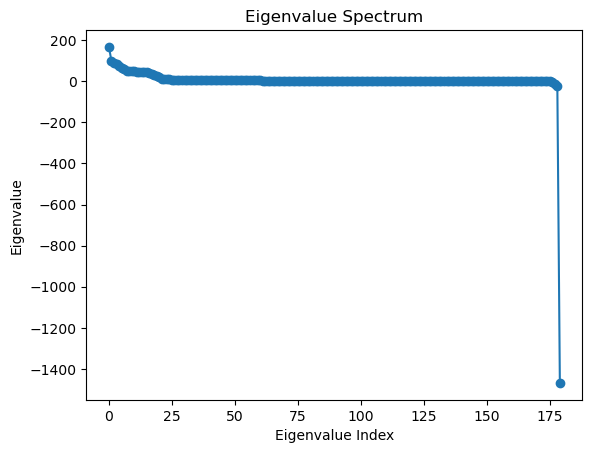

In [56]:
import numpy as np

# Assuming you have computed the Degree Matrix D earlier

# Compute D^{-1/2} and D^{1/2}
D_inv_sqrt = np.linalg.inv(np.sqrt(D))
D_sqrt = np.sqrt(D)

# Assuming you have computed the affinity_matrix earlier

# Compute the Normalized Laplacian Matrix L_norm
L_norm = np.identity(len(D)) - np.dot(np.dot(D_inv_sqrt, affinity_matrix), D_sqrt)

# Spectral decomposition
eigenvalues, eigenvectors = np.linalg.eigh(L_norm)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

sorted_eigenvalues = np.sort(eigenvalues)[::-1]
import matplotlib.pyplot as plt
plt.plot(sorted_eigenvalues, marker='o')
plt.title('Eigenvalue Spectrum')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.show()

In [91]:
k = 50  # You need to decide the appropriate value

selected_eigenvectors = eigenvectors[:, :k]

# Apply K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(selected_eigenvectors)

# Add the cluster labels to your DataFrame
df_encoded['Cluster'] = cluster_labels




C:\Users\Cait\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Cait\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [93]:
import pandas as pd


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print or analyze the clusters
print(df_encoded[['Plot ID', 'Cluster']])

# After you're done, you can reset to default display settings
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


     Plot ID  Cluster
0         17        1
1         17        1
2         17       18
3         17        8
4         17        1
5         17        1
6         17        7
7         17        1
8         17        1
9         17        8
10        18       41
11        18        8
12        18        1
13        18        8
14        18       10
15        18       29
16        18        8
17        18        8
18        18       17
19        18        8
20        19        8
21        19        8
22        19        8
23        19       36
24        19        8
25        19        1
26        19        8
27        19        8
28        19        8
29        19        8
30        20        1
31        20        8
32        20        1
33        20        8
34        20       49
35        20        8
36        20        8
37        20       49
38        20       45
39        20        8
40        21        5
41        21        1
42        21       27
43        21        8
44        

In the excel spreadsheet with data used to list data to help research nematode in agriculture, there are repetitions of Plot IDs as well. These repetitions differ in data. The results show that the clustering is also affected by the values growth, fruit weight, root weight, root-knot nematodes, and grain translocation. With the plot ID 17, several of the mentioned columns have zero values. Consequently, I believe that the lower the combination of those values are, the lower the cluster is in. While many of the same plot IDs have the same cluster, there are variations. Thus, the clusters are not all equal in size. And it shows the variable that connect some portions of a plot with a different plot.

In [62]:
#Eiegen Centrality

#Subreddit /r/dogs:Woof
#Hypothesis: The subreddit discusses topics involving different dog breeds and personalities. 
#I hypothesize that the dog breeds with higher eigenvector centrality will 
#be those on Forbes' list of 20 most popular dogs in the US

#I apologize sir but this section is incomplete. I was not able to get portions working and did not know how to move forward. 
#Have a good christmas break!

In [65]:
!pip install praw


  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ------------------------------------ --- 174.1/191.0 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 5.8 MB/s eta 0:00:00


In [66]:
import praw

reddit = praw.Reddit(
    client_id='zT9nlb1orD1C-ycbv2hQVg',
    client_secret='ASwzUZydtJUioZ5kYL4y0lwwTSr2ig',
    user_agent='CCML90',
)


In [99]:
subreddit = reddit.subreddit('dogs')

# Get top posts
top_posts = subreddit.top(limit=10)

for post in top_posts:
    print(f"Title: {post.title}, Author: {post.author}")


ResponseException: received 401 HTTP response

In [100]:
import networkx as nx
import matplotlib.pyplot as plt

subreddit = reddit.subreddit('dogs')

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on the data
for post in top_posts:
    author_name = post.author.name if post.author else 'Unknown'  # Handle cases where author is deleted
    G.add_node(author_name)
    # You can add more logic to define edges based on your data
    

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())



ResponseException: received 401 HTTP response

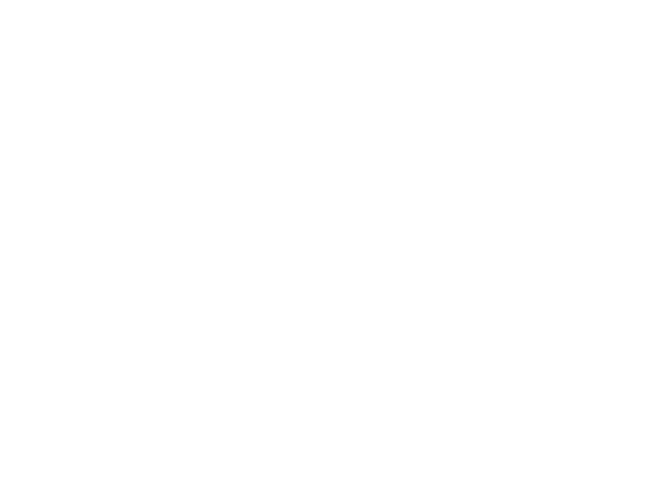

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G)  # You can choose different layout algorithms
nx.draw(G, pos, with_labels=True, font_size=8, node_size=50)

# Show the plot
plt.show()
